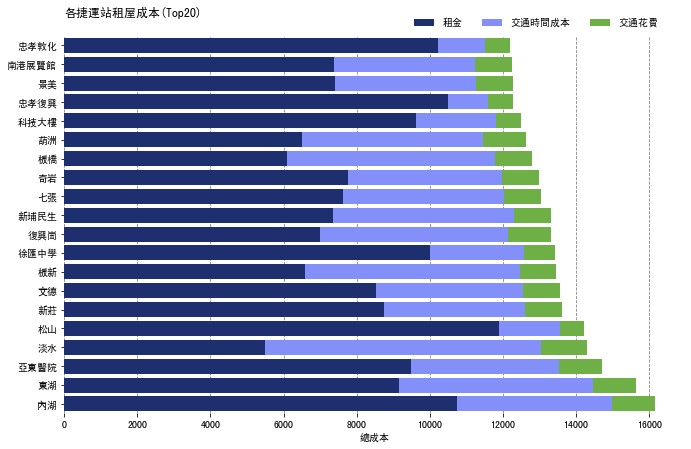

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import tkinter as tk
from tkinter import *

# 讀入捷運資料
df_p = pd.read_excel('MRT_全票.xlsx', index_col ="站名")
df_t = pd.read_excel('MRT_乘車時間.xlsx', index_col ="站名")
mrt = ["動物園","木柵","萬芳社區","萬芳醫院","辛亥","麟光","六張犁","科技大樓","大安","忠孝復興",
       "南京復興","中山國中","松山機場","大直","劍南路","西湖","港墘","文德","內湖","大湖公園","葫洲",
       "東湖","南港軟體園區","南港展覽館","象山","台北101/世貿","信義安和","大安","大安森林公園",
       "東門","中正紀念堂","台大醫院","台北車站","中山","雙連","民權西路","圓山","劍潭","士林","芝山",
       "明德","石牌","唭哩岸","奇岩","北投","新北投","復興崗","忠義","關渡","竹圍","紅樹林","淡水",
       "新店","新店區公所","七張","小碧潭","大坪林","景美","萬隆","公館","台電大樓","古亭","中正紀念堂",
       "小南門","西門","北門","中山","松江南京","南京復興","台北小巨蛋","南京三民","松山","南勢角","景安",
       "永安市場","頂溪","古亭","東門","忠孝新生","松江南京","行天宮","中山國小","民權西路","大橋頭",
       "台北橋","菜寮","三重","先嗇宮","頭前庄","新莊","輔大","丹鳳","迴龍","三重國小","三和國中","徐匯中學",
       "三民高中","蘆洲","頂埔","永寧","土城","海山","亞東醫院","府中","板橋","新埔","江子翠","龍山寺",
       "西門","台北車站","善導寺","忠孝新生","忠孝復興","忠孝敦化","國父紀念館","市政府","永春","後山埤",
       "昆陽","南港","南港展覽館", "大坪林","十四張","秀朗橋","景平","景安","中和","橋和","中原","板新",
       "板橋","新埔民生","頭前庄","幸福","新北產業園區"]


# 讀入591房租資料並清理距離資料
df_h = pd.read_csv('output.csv')
df_h['station'] = df_h['station'].str.strip()
new = df_h["distance"].str.split("站 ", n = 1, expand = True)
df_h["dis"]= new[1]
df_h.drop(columns =["distance"], inplace = True)
df_h['dis'] = df_h['dis'].str.replace("m","")
df_h['dis'] = df_h['dis'].astype(int)

# 將591房租資料放入資料庫
conn = sqlite3.connect('rent.db')
cursor = conn.cursor()
cursor.execute("DROP TABLE rent") # 避免重複建立資料表
conn.commit()
cursor.execute('CREATE TABLE rent(station, id, price, type, size, floor, status, dis)')  # 建立資料表
conn.commit()
df_h.to_sql('rent', conn, if_exists='append', index=False)

### 第一頁輸入資料
def page1(window):
    global data, variable_a, u_station, optionmenu_b, salary, u_type, u_dis
    window.geometry("%dx%d+%d+%d" % (800, 500, 200, 150))
    window.title("捷運站租屋")
    data = {'文湖線': ["動物園","木柵","萬芳社區","萬芳醫院","辛亥","麟光",
                "六張犁","科技大樓","大安","忠孝復興","南京復興","中山國中",
                "松山機場","大直","劍南路","西湖","港墘","文德","內湖",
                "大湖公園","葫洲","東湖","南港軟體園區","南港展覽館"],
        '淡水信義線': ["象山","台北101/世貿","信義安和","大安","大安森林公園",
                  "東門","中正紀念堂","台大醫院","台北車站","中山","雙連",
                  "民權西路","圓山","劍潭","士林","芝山","明德","石牌",
                  "唭哩岸","奇岩","北投","新北投","復興崗","忠義","關渡",
                  "竹圍","紅樹林","淡水"], 
        '松山新店線': ["新店","新店區公所","七張","小碧潭","大坪林","景美",
                  "萬隆","公館","台電大樓","古亭","中正紀念堂","小南門","西門",
                  "北門","中山","松江南京","南京復興","台北小巨蛋","南京三民","松山"],
        '中和新蘆線': ["南勢角","景安","永安市場","頂溪","古亭","東門","忠孝新生",
                  "松江南京","行天宮","中山國小","民權西路","大橋頭",
                  "台北橋","菜寮","三重","先嗇宮","頭前庄","新莊","輔大",
                  "丹鳳","迴龍","三重國小","三和國中","徐匯中學","三民高中","蘆洲"], 
        '板南線': ["頂埔","永寧","土城","海山","亞東醫院","府中","板橋","新埔",
                "江子翠","龍山寺","西門","台北車站","善導寺","忠孝新生",
                "忠孝復興","忠孝敦化","國父紀念館","市政府","永春","後山埤",
                "昆陽","南港","南港展覽館"], 
        '環狀線': ["大坪林","十四張","秀朗橋","景平","景安","中和","橋和",
                "中原","板新","板橋","新埔民生","頭前庄","幸福","新北產業園區"]
       }


    L1 = Label(window,  text='公司所在捷運站', width=100 )  
    L1.pack(side = TOP, pady=10) 

    variable_a = StringVar()
    u_station = StringVar()

    variable_a.trace('w', update_options)
    optionmenu_a = OptionMenu(window, variable_a, *data.keys())
    optionmenu_b = OptionMenu(window, u_station, "")

    variable_a.set('文湖線')
    optionmenu_a.pack()
    u_station.set('動物園')
    optionmenu_b.pack()


    L2 = Label(window, text="月收入（請輸入數字）")
    L2.pack( side = TOP, pady=10)
    salary = Entry(window, bd =10)
    salary.pack()

    u_type = StringVar(window)
    u_type.set("請選擇房型")
    L3 = Label(window,  text='租屋房型', width=100 )  
    L3.pack(side=TOP, pady=10) 
    optionmenu_c= OptionMenu(window, u_type, "分租套房","獨立套房", "雅房")
    optionmenu_c.pack() 

    u_dis = StringVar(window)
    u_dis.set("可接受距離")
    L4 = Label(window,  text='離捷運站距離', width=100 )  
    L4.pack(side=TOP, pady=10) 
    optionmenu_c= OptionMenu(window, u_dis, "500公尺以內","1000公尺以內", "1500公尺以內")
    optionmenu_c.pack() 


    display = Label(window)
    display.pack()
    
    btnShow = Button(window, text="查看結果", command=show)
    btnShow.pack()

### 第一頁讓使用者選完捷運線後，讓呈現的捷運站可以更新
def update_options(*args):
    global u_station, menu, optionmenu_b, menu
    line = data[variable_a.get()]
    u_station.set(line[0])
    menu = optionmenu_b['menu']
    menu.delete(0, 'end')
    for l in line:
        menu.add_command(label=l, command=lambda nation = l: u_station.set(nation))

### 按下按鈕後，抓取資料、計算成本及切換到下一頁
def show():
    # 抓取、清理使用者輸入及選擇的內容
    global salary, start, time_s, u_dis, u_type ,df_rent_cost, pagenum, window
    u_dis = u_dis.get()
    u_dis = u_dis.replace("公尺以內","")
    salary = salary.get()
    start = u_station.get()
    u_type = u_type.get()
    time_s = int(salary)/160
    cost = pd.DataFrame(columns=['station','time','ticket'])
    
    # 取得時間和票價
    for i in mrt:
        if type(df_p[start][i])==pd.core.series.Series: # 當訖站為不同捷運路線交叉站(東門、忠孝復興）
            ticket_p = int(df_p[start][i][0])*42*0.8  # 假設一個月通勤21天，每天兩趟，並以捷運常客優惠計算
            if ticket_p >= 1280: # 超過1280以月票計算
                ticket_p = 1280
            cost = cost.append({'station': i,
                        'time': (int(df_t[start][i][0])*42)/60,
                        'ticket': ticket_p,
                       }
                       ,ignore_index=True
                      )
        else: # 當訖站不是交叉站
            ticket_p = df_p[start][i]*42*0.8
            if ticket_p >= 1280:
                ticket_p = 1280
            cost = cost.append({'station': i,
                        'time': (df_t[start][i]*42)/60,
                        'ticket': ticket_p,
                       }
                       ,ignore_index=True
                      )
    # 取得符合特定條件（房型、距離）的租房價格平均       
    sql = "select avg(price), station, status from rent where dis <=" + u_dis + " AND status = '" + u_type +"'group by station, status"
    rent_df = pd.read_sql(sql, conn)
    
    # 將乘車時間票價表格和租金表格合併、清除重複或缺資料的列
    df_rent_cost = rent_df.set_index('station').join(cost.set_index('station'))
    df_rent_cost = df_rent_cost.drop_duplicates()
    df_rent_cost = df_rent_cost.dropna()
    df_rent_cost['time'] = df_rent_cost['time']*time_s
    df_rent_cost['total'] = df_rent_cost['avg(price)'] + df_rent_cost.ticket + df_rent_cost.time
    df_rent_cost = df_rent_cost.sort_values(by=['total'], ascending=False)  # 由小到大排列總成本
    df_rent_cost = df_rent_cost.head(20)
    
    # 切到下一頁
    for widget in window.winfo_children():
        widget.destroy()
    if pagenum == 1:
        page2(window)
        pagenum = 2


### 第二頁呈現圖表
def page2(window):  
    window.geometry("%dx%d+%d+%d" % (800, 500, 200, 150))
    fields = ['avg(price)','time','ticket']
    colors = ['#1D2F6F', '#8390FA', '#6EAF46']
    labels = ['租金', '交通時間成本', '交通花費']
    # 圖片跟軸大小
    fig, ax = plt.subplots(1, figsize=(12, 10))
    # 長條圖
    left = len(df_rent_cost) * [0]
    for idx, name in enumerate(fields):
        plt.barh(df_rent_cost.index, df_rent_cost[name], left = left, color=colors[idx])
        left = left + df_rent_cost[name]
    # 標題、圖例、標籤
    plt.title('各捷運站租屋成本(Top20)\n', loc='left')
    plt.legend(labels, bbox_to_anchor=([0.55, 1, 0, 0]), ncol=4, frameon=False)
    plt.xlabel('總成本')
    # 移除匡線及整體細節調整
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
    ax.set_axisbelow(True)
    ax.xaxis.grid(color='gray', linestyle='dashed')
    bar1 = FigureCanvasTkAgg(fig, window)
    bar1.get_tk_widget().pack(side=tk.LEFT, fill=tk.BOTH)
    
    # 結束按鈕
    btnShow = Button(window, text="結束", command=quit)
    btnShow.pack(side = BOTTOM)

### 按下按鈕結束視窗
def quit():
    window.destroy()

# 防止matplotlib中文亂碼問題
from matplotlib.font_manager import _rebuild
_rebuild()
import matplotlib as mpl
mpl.rcParams['font.sans-serif']=[u'SimHei']
mpl.rcParams['axes.unicode_minus']=False
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

pagenum = 1
window = Tk()
page1(window)
window.mainloop()

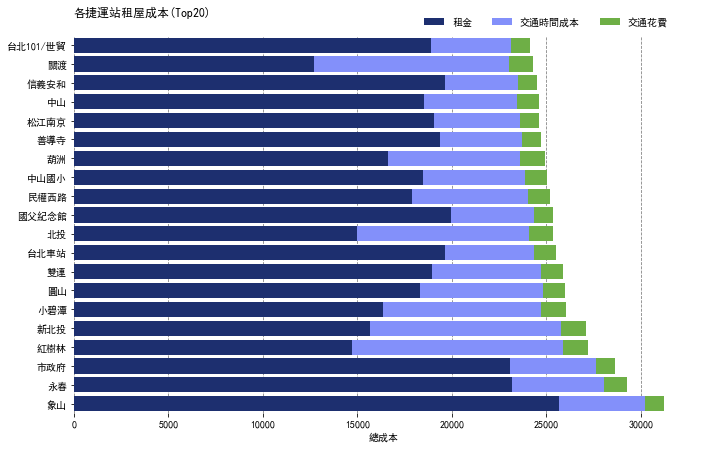

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import tkinter as tk
from tkinter import *

# 讀入捷運資料
df_p = pd.read_excel('MRT_全票.xlsx', index_col ="站名")
df_t = pd.read_excel('MRT_乘車時間.xlsx', index_col ="站名")
mrt = ["動物園","木柵","萬芳社區","萬芳醫院","辛亥","麟光","六張犁","科技大樓","大安","忠孝復興",
       "南京復興","中山國中","松山機場","大直","劍南路","西湖","港墘","文德","內湖","大湖公園","葫洲",
       "東湖","南港軟體園區","南港展覽館","象山","台北101/世貿","信義安和","大安","大安森林公園",
       "東門","中正紀念堂","台大醫院","台北車站","中山","雙連","民權西路","圓山","劍潭","士林","芝山",
       "明德","石牌","唭哩岸","奇岩","北投","新北投","復興崗","忠義","關渡","竹圍","紅樹林","淡水",
       "新店","新店區公所","七張","小碧潭","大坪林","景美","萬隆","公館","台電大樓","古亭","中正紀念堂",
       "小南門","西門","北門","中山","松江南京","南京復興","台北小巨蛋","南京三民","松山","南勢角","景安",
       "永安市場","頂溪","古亭","東門","忠孝新生","松江南京","行天宮","中山國小","民權西路","大橋頭",
       "台北橋","菜寮","三重","先嗇宮","頭前庄","新莊","輔大","丹鳳","迴龍","三重國小","三和國中","徐匯中學",
       "三民高中","蘆洲","頂埔","永寧","土城","海山","亞東醫院","府中","板橋","新埔","江子翠","龍山寺",
       "西門","台北車站","善導寺","忠孝新生","忠孝復興","忠孝敦化","國父紀念館","市政府","永春","後山埤",
       "昆陽","南港","南港展覽館", "大坪林","十四張","秀朗橋","景平","景安","中和","橋和","中原","板新",
       "板橋","新埔民生","頭前庄","幸福","新北產業園區"]


# 讀入591房租資料並清理距離資料
df_h = pd.read_csv('output.csv')
df_h['station'] = df_h['station'].str.strip()
new = df_h["distance"].str.split("站 ", n = 1, expand = True)
df_h["dis"]= new[1]
df_h.drop(columns =["distance"], inplace = True)
df_h['dis'] = df_h['dis'].str.replace("m","")
df_h['dis'] = df_h['dis'].astype(int)

# 將591房租資料放入資料庫
conn = sqlite3.connect('rent.db')
cursor = conn.cursor()
cursor.execute("DROP TABLE rent") # 避免重複建立資料表
conn.commit()
cursor.execute('CREATE TABLE rent(station, id, price, type, size, floor, status, dis)')  # 建立資料表
conn.commit()
df_h.to_sql('rent', conn, if_exists='append', index=False)

### 第一頁輸入資料
def page1(window):
    global data, variable_a, u_station, optionmenu_b, salary, u_type, u_dis
    window.geometry("%dx%d+%d+%d" % (800, 500, 200, 150))
    window.title("捷運站租屋")
    data = {'文湖線': ["動物園","木柵","萬芳社區","萬芳醫院","辛亥","麟光",
                "六張犁","科技大樓","大安","忠孝復興","南京復興","中山國中",
                "松山機場","大直","劍南路","西湖","港墘","文德","內湖",
                "大湖公園","葫洲","東湖","南港軟體園區","南港展覽館"],
        '淡水信義線': ["象山","台北101/世貿","信義安和","大安","大安森林公園",
                  "東門","中正紀念堂","台大醫院","台北車站","中山","雙連",
                  "民權西路","圓山","劍潭","士林","芝山","明德","石牌",
                  "唭哩岸","奇岩","北投","新北投","復興崗","忠義","關渡",
                  "竹圍","紅樹林","淡水"], 
        '松山新店線': ["新店","新店區公所","七張","小碧潭","大坪林","景美",
                  "萬隆","公館","台電大樓","古亭","中正紀念堂","小南門","西門",
                  "北門","中山","松江南京","南京復興","台北小巨蛋","南京三民","松山"],
        '中和新蘆線': ["南勢角","景安","永安市場","頂溪","古亭","東門","忠孝新生",
                  "松江南京","行天宮","中山國小","民權西路","大橋頭",
                  "台北橋","菜寮","三重","先嗇宮","頭前庄","新莊","輔大",
                  "丹鳳","迴龍","三重國小","三和國中","徐匯中學","三民高中","蘆洲"], 
        '板南線': ["頂埔","永寧","土城","海山","亞東醫院","府中","板橋","新埔",
                "江子翠","龍山寺","西門","台北車站","善導寺","忠孝新生",
                "忠孝復興","忠孝敦化","國父紀念館","市政府","永春","後山埤",
                "昆陽","南港","南港展覽館"], 
        '環狀線': ["大坪林","十四張","秀朗橋","景平","景安","中和","橋和",
                "中原","板新","板橋","新埔民生","頭前庄","幸福","新北產業園區"]
       }


    L1 = Label(window,  text='公司所在捷運站', width=100 )  
    L1.pack(side = TOP, pady=10) 

    variable_a = StringVar()
    u_station = StringVar()

    variable_a.trace('w', update_options)
    optionmenu_a = OptionMenu(window, variable_a, *data.keys())
    optionmenu_b = OptionMenu(window, u_station, "")

    variable_a.set('文湖線')
    optionmenu_a.pack()
    u_station.set('動物園')
    optionmenu_b.pack()


    L2 = Label(window, text="月收入（請輸入數字）")
    L2.pack( side = TOP, pady=10)
    salary = Entry(window, bd =10)
    salary.pack()

    u_type = StringVar(window)
    u_type.set("請選擇房型")
    L3 = Label(window,  text='租屋房型', width=100 )  
    L3.pack(side=TOP, pady=10) 
    optionmenu_c= OptionMenu(window, u_type, "分租套房","獨立套房", "雅房")
    optionmenu_c.pack() 

    u_dis = StringVar(window)
    u_dis.set("可接受距離")
    L4 = Label(window,  text='離捷運站距離', width=100 )  
    L4.pack(side=TOP, pady=10) 
    optionmenu_c= OptionMenu(window, u_dis, "500公尺以內","1000公尺以內", "1500公尺以內")
    optionmenu_c.pack() 


    display = Label(window)
    display.pack()
    
    btnShow = Button(window, text="查看結果", command=show)
    btnShow.pack()

### 第一頁讓使用者選完捷運線後，讓呈現的捷運站可以更新
def update_options(*args):
    global u_station, menu, optionmenu_b, menu
    line = data[variable_a.get()]
    u_station.set(line[0])
    menu = optionmenu_b['menu']
    menu.delete(0, 'end')
    for l in line:
        menu.add_command(label=l, command=lambda nation = l: u_station.set(nation))

### 按下按鈕後，抓取資料、計算成本及切換到下一頁
def show():
    # 抓取、清理使用者輸入及選擇的內容
    global salary, start, time_s, u_dis, u_type ,df_rent_cost, pagenum, window
    u_dis = u_dis.get()
    u_dis = u_dis.replace("公尺以內","")
    salary = salary.get()
    start = u_station.get()
    u_type = u_type.get()
    time_s = int(salary)/160
    cost = pd.DataFrame(columns=['station','time','ticket'])
    
    # 取得時間和票價
    for i in mrt:
        if type(df_p[start][i])==pd.core.series.Series: # 當訖站為不同捷運路線交叉站(東門、忠孝復興）
            ticket_p = int(df_p[start][i][0])*42*0.8  # 假設一個月通勤21天，每天兩趟，並以捷運常客優惠計算
            if ticket_p >= 1280: # 超過1280以月票計算
                ticket_p = 1280
            cost = cost.append({'station': i,
                        'time': (int(df_t[start][i][0])*42)/60,
                        'ticket': ticket_p,
                       }
                       ,ignore_index=True
                      )
        else: # 當訖站不是交叉站
            ticket_p = df_p[start][i]*42*0.8
            if ticket_p >= 1280:
                ticket_p = 1280
            cost = cost.append({'station': i,
                        'time': (df_t[start][i]*42)/60,
                        'ticket': ticket_p,
                       }
                       ,ignore_index=True
                      )
    # 取得符合特定條件（房型、距離）的租房價格平均       
    sql = "select avg(price), station, status from rent where dis <=" + u_dis + " AND status = '" + u_type +"'group by station, status"
    rent_df = pd.read_sql(sql, conn)
    
    # 將乘車時間票價表格和租金表格合併、清除重複或缺資料的列
    df_rent_cost = rent_df.set_index('station').join(cost.set_index('station'))
    df_rent_cost = df_rent_cost.drop_duplicates()
    df_rent_cost = df_rent_cost.dropna()
    df_rent_cost['time'] = df_rent_cost['time']*time_s
    df_rent_cost['total'] = df_rent_cost['avg(price)'] + df_rent_cost.ticket + df_rent_cost.time
    df_rent_cost = df_rent_cost.sort_values(by=['total'], ascending=False)  # 由小到大排列總成本
    df_rent_cost = df_rent_cost.head(20)
    
    # 切到下一頁
    for widget in window.winfo_children():
        widget.destroy()
    if pagenum == 1:
        page2(window)
        pagenum = 2


### 第二頁呈現圖表
def page2(window):  
    window.geometry("%dx%d+%d+%d" % (800, 500, 200, 150))
    fields = ['avg(price)','time','ticket']
    colors = ['#1D2F6F', '#8390FA', '#6EAF46']
    labels = ['租金', '交通時間成本', '交通花費']
    # 圖片跟軸大小
    fig, ax = plt.subplots(1, figsize=(12, 10))
    # 長條圖
    left = len(df_rent_cost) * [0]
    for idx, name in enumerate(fields):
        plt.barh(df_rent_cost.index, df_rent_cost[name], left = left, color=colors[idx])
        left = left + df_rent_cost[name]
    # 標題、圖例、標籤
    plt.title('各捷運站租屋成本(Top20)\n', loc='left')
    plt.legend(labels, bbox_to_anchor=([0.55, 1, 0, 0]), ncol=4, frameon=False)
    plt.xlabel('總成本')
    # 移除匡線及整體細節調整
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
    ax.set_axisbelow(True)
    ax.xaxis.grid(color='gray', linestyle='dashed')
    bar1 = FigureCanvasTkAgg(fig, window)
    bar1.get_tk_widget().pack(side=tk.LEFT, fill=tk.BOTH)
    
    # 結束按鈕
    btnShow = Button(window, text="結束", command=quit)
    btnShow.pack(side = BOTTOM)

### 按下按鈕結束視窗
def quit():
    window.destroy()

# 防止matplotlib中文亂碼問題
from matplotlib.font_manager import _rebuild
_rebuild()
import matplotlib as mpl
mpl.rcParams['font.sans-serif']=[u'SimHei']
mpl.rcParams['axes.unicode_minus']=False
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

pagenum = 1
window = Tk()
page1(window)
window.mainloop()